# HOUSING KAGGLE REGRESSION PROBLEM






### First regression model
OOTB Random Forest Regressor to be used as our ruler

In [0]:
# loading dataset into the script
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/LeoFernanndes/datasets/master/housing_train.csv')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [0]:
# a generic method to arrange the variables
housing = df.copy()

# starting by filling the blank spaces 
for column in housing.columns:
    if housing[column].dtype != 'object':
        housing[column].fillna(housing[column].mean(), inplace= True)
    else:
        housing[column] = housing[column].astype('str')
        housing[column].fillna(housing[column].mode(), inplace= True)

In [0]:
## fitting the first regression model 
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

# splitting the dependent (predictor) and dependent (target) features
x = housing.drop(['SalePrice'], axis= 1)
y = housing['SalePrice']

# applying label encoding
le = LabelEncoder()
for column in x.columns:
    if x[column].dtype == 'object':
        x[column] = le.fit_transform(x[column])

# splitting the data into train and test
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size= 0.2, random_state= 55)

In [4]:
# calling the regressor
reg1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

# fitting the model
reg1.fit(x_treino, y_treino)

# making the prediction of target in trein set
prev = reg1.predict(x_teste)


# error evaluation
from sklearn.metrics import mean_squared_log_error
import numpy as np


erro = np.sqrt(mean_squared_log_error(y_teste, prev))
erro

0.13205017272265604

In [0]:
# making the predictions over submission set
# loading submission data
url_data = 'https://raw.githubusercontent.com/LeoFernanndes/datasets/master/housing_test.csv'
data = pd.read_csv(url_data)

In [0]:
# filling in the gaps in the same manner as used in the trein set
for column in data.columns:
    if data[column].dtype != 'object':
        data[column].fillna(data[column].mean(), inplace= True)
    else:
        data[column] = data[column].astype('str')
        data[column].fillna(data[column].mode(), inplace= True)

# using label encoder over the test set the same way as used in trein set 
le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])

In [0]:
# df for kaggle evaluation
final = reg1.predict(data)
envio = pd.DataFrame({'Id': data['Id'], 'SalePrice': final})

In [0]:
# saving the df in a csv to be uploaded

#path = r'C:\Users\Avell\Desktop\Python\github\datasets'
#nome = '\housing_submission_1.csv'
#envio.to_csv(path+nome, index= False)

Of corse we didn't expect here anything extremely accurate for some reasons:
* The model itself was implemented just out of the box
* The approach to fill the missing values using mode to categorical features and mean in the case of numerical ones didn't take in account any exploratory analysis of the variables
* No methodology for feature engineering and in order to tune model precision by finding cerrelations or opportunities to dimensional reduction
* All categorical features were encoded with the same method

## Model improvement attempts
### Second regression model scoring rmsle 0.1466

In [0]:
# checando com o feature importance
featimp = pd.Series(reg1.feature_importances_, index= x_teste.columns).sort_values(ascending=False)
featimp.index
feat_upper = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'BsmtFinSF1', 'GarageArea',
       '1stFlrSF', 'BsmtQual', '2ndFlrSF', 'YearRemodAdd', 'GarageYrBlt',
       'BsmtUnfSF', 'Neighborhood', 'LotArea', 'YearBuilt', 'TotRmsAbvGrd',
       'GarageCars', 'Id', 'CentralAir', 'OverallCond', 'MasVnrArea',
       'GarageType', 'WoodDeckSF', 'LotFrontage', 'GarageFinish',
       'BsmtExposure', 'KitchenQual', 'BsmtFinType1', 'OpenPorchSF',
       'HalfBath', 'Exterior2nd', 'YrSold', 'LotShape', 'MSZoning']

In [0]:
# novo x
x2 = x.copy()
y2 = y.copy()

# novo encoding
le2 = LabelEncoder()
for column in x2.columns:
    if x2[column].dtype == 'object':
        x2[column] = le2.fit_transform(x2[column])

In [11]:
# chamando o modelo
reg2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

x2_treino, x2_teste, y2_treino, y2_teste = train_test_split(x2, y2, test_size= 0.2, random_state= 11)

# ajustando um modelo
reg2.fit(x2_treino, y2_treino)

# fazendo a previsao
prev2 = reg2.predict(x2_teste)


# avaliando o erro
from sklearn.metrics import mean_squared_log_error
import numpy as np


error2 = np.sqrt(mean_squared_log_error(y2_teste, prev2))
error2


0.147382014870599

In [12]:
y_axis = []
x_axis = []

for m in(range(len(featimp.index))):

  error2_ = 0
  n = 5
  
  for i in(range(n)):
    # chamando o modelo
    reg2 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
              max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
              oob_score=False, random_state=None, verbose=0, warm_start=False)

    x2_treino, x2_teste, y2_treino, y2_teste = train_test_split(x2, y2, test_size= 0.2, random_state= i)

    # ajustando um modelo
    reg2.fit(x2_treino[featimp.index[0: m+1]], y2_treino)

    # fazendo a previsao
    prev2 = reg2.predict(x2_teste[featimp.index[0: m+1]])


    # avaliando o erro
    from sklearn.metrics import mean_squared_log_error
    import numpy as np


    error2 = np.sqrt(mean_squared_log_error(y2_teste, prev2))
    #print(error2)
    error2_ += error2

  y_axis.append(error2_/n)
  x_axis.append(m)
  print(m, error2_/n)

0 0.2196689292315009
1 0.21436309673335954
2 0.18053377090471323
3 0.17193758096677292
4 0.16760821440370466
5 0.1592418024376098
6 0.1602280833792786
7 0.15738975951927733
8 0.15502768114321755
9 0.15575437257589905
10 0.15002580842084476
11 0.146004496162824
12 0.14621803209098716
13 0.14768864348902316
14 0.14609035525973374
15 0.14718263889723474
16 0.14378612520690576
17 0.1451407915859284
18 0.14534076479240335
19 0.1449456817743507
20 0.14585676464027722
21 0.14134302873483356
22 0.14014996400277507
23 0.13935534975431083
24 0.14077420737210117
25 0.14096549635967165
26 0.14136084737108823
27 0.1412666468915178
28 0.13983435742687722
29 0.14125048516847669
30 0.14083212252840333
31 0.14031201500280202
32 0.13946485166939518
33 0.13989306454111683
34 0.14013058036111414
35 0.14051127655330148
36 0.14050906899622434
37 0.1402051060658543
38 0.14077645536169542
39 0.14037230384782318
40 0.13976143060006088
41 0.13964865033816734
42 0.14062805404169895
43 0.13893485533998504
44 0.13

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79],
 [0.2196689292315009,
  0.21436309673335954,
  0.18053377090471323,
  0.17193758096677292,
  0.16760821440370466,
  0.1592418024376098,
  0.1602280833792786,
  0.15738975951927733,
  0.15502768114321755,
  0.15575437257589905,
  0.15002580842084476,
  0.146004496162824,
  0.14621803209098716,
  0.14768864348902316,
  0.14609035525973374,
  0.14718263889723474,
  0.14378612520690576,
  0.1451407915859284,
  0.14534076479240335,
  0.1449456817743507,
  0.14585676464027722,
  0.14134302873483356,
  0.14014996400277507,
  0.139

In [23]:
error_df = pd.DataFrame({'n of features': x_axis,
                         'error': y_axis}).sort_values(by= ['error'], ascending= True)

error_df

,n of features,error
55,55,0.138360
43,43,0.138935
62,62,0.138978
76,76,0.139044
71,71,0.139051
77,77,0.139092
47,47,0.139110
75,75,0.139123
50,50,0.139226
56,56,0.139308


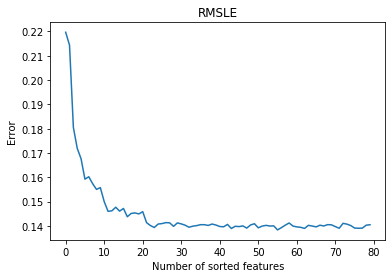

In [19]:
import matplotlib.pyplot as plt

plt.title('RMSLE')
plt.xlabel('Number of sorted features')
plt.ylabel('Error')
plt.plot(x_axis, y_axis)
plt.show()

In [0]:
dataframe = pd.read_csv('https://raw.githubusercontent.com/LeoFernanndes/datasets/master/housing_train.csv')

In [14]:
# exploring data 

for column in dataframe.columns:
  if dataframe[column].dtype == 'object':
    print(dataframe[column].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: